In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
carvana = pd.read_csv("final_data.csv")

carvana.head()

,Unnamed: 0,VehYear,VehicleAge,VehOdo,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,AcquisitionAuctionRatio,AcquisitionRetailRatio,CurrentAuctionRatio,CurrentRetailRatio,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Transmission_AUTO,Transmission_MANUAL,WheelType_Alloy,WheelType_Covers,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,IsBadBuy
0,0,-0.191806,-0.106505,0.157568,-0.930981,-1.065435,-0.166793,0.194455,-1.031687,-2.244656,-0.629052,-1.410765,-0.681319,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,1,-0.768751,0.475038,-0.401661,-0.930981,-1.523737,-0.166793,-1.075463,-1.031687,-1.707170,-0.674570,-1.864448,-1.236092,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,2,-0.191806,-0.106505,-0.145604,-0.930981,-1.581025,-0.166793,-0.422936,-1.031687,-0.684055,0.650894,-1.184988,-0.080909,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,3,-0.768751,0.475038,0.652406,-0.930981,-0.664420,-0.166793,-1.135696,-1.031687,-0.367682,-1.387553,-0.136808,0.122449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,4,-0.768751,0.475038,0.319123,-0.930981,1.168791,-0.166793,-0.590250,-1.031687,-0.352668,-0.375692,-0.242636,0.598443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [3]:
X = carvana.drop(["Unnamed: 0", "IsBadBuy"], axis = 1)
y = carvana['IsBadBuy']

# KREIRANJE MODELA

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2019)

#### STABLO ODLUCIVANJA

In [5]:

# Grid -> napravice matricu svih mogucih kombinacija (7*5*3) (iscrno pretrazuje)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [3,4,5,10,15,20,30], 'min_samples_leaf': [10,15,20,25,30], 'max_depth': [10,15,20,25]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring='roc_auc')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [3, 4, 5, 10, 15, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 25, 30]},
             scoring='roc_auc')

Istampajmo optimalne hiperparametre i optimalan model:

In [6]:
grid.best_params_

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 30}

In [7]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=10, min_samples_leaf=30)

Izgradimo optimalan model stabla:

In [8]:
from sklearn.model_selection import cross_val_score
model_tree = grid.best_estimator_
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=10, min_samples_leaf=30)

Vrednost auc metrike na train delu:

In [9]:
scores = cross_val_score(model_tree, X_train, y_train, cv = 10, scoring = 'roc_auc')
scores.mean()

0.6227714962156741

Izgradimo matricu konfuzije i sracunajmo metrike:

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
y_pred_tree = model_tree.predict_proba(X_test)[:, 1] >= 0.2
y_pred_tree

confusion_matrix(y_test, y_pred_tree)

array([[1454,  311],
       [ 191,   84]], dtype=int64)

Funckija za racunanje evaluacionih metrika:

In [11]:
def print_performance(y, y_pred):
    print(f'Accuracy : {accuracy_score(y, y_pred)}')
    print(f'Precision : {precision_score(y, y_pred)}')
    print(f'Recall : {recall_score(y, y_pred)}')
    print(f'F1 : {f1_score(y, y_pred)}')
    

Metrike za stablo:

In [12]:
print_performance(y_test, y_pred_tree)

Accuracy : 0.753921568627451
Precision : 0.21265822784810126
Recall : 0.3054545454545455
F1 : 0.2507462686567164


Auc na test delu:

In [13]:
roc_auc_score(y_test, y_pred_tree)

0.5646252897244398

Hajde da ispititamo podoblast oko optimalnih hiperparametara od strane GridSearchCV():

In [14]:

tree_params = {'max_features': [3,4,5,6,7,8], 'min_samples_leaf': [18,19,20,21,22], 'max_depth': [12,13,14,15,16,17,18]}

grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv = 5, scoring='roc_auc')
grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 21}

Izgradimo model sa tim otpimalnim hiperparametrima:

In [15]:
model_tree = grid.best_estimator_
model_tree.fit(X_train, y_train)

# tu je negde

DecisionTreeClassifier(max_depth=15, max_features=5, min_samples_leaf=21)

AUC na train delu:

In [16]:
scores = cross_val_score(model_tree, X_train, y_train, cv = 10, scoring = 'roc_auc')
scores.mean()

0.6096739636485076

AUC na test delu:

In [17]:

roc_auc_score(y_test, y_pred_tree)

0.5646252897244398

#### LOGISTICKA REGRESIJA

In [18]:

from sklearn.linear_model import LogisticRegression

logistic_parameters = {'C' : np.logspace(start = -4, stop = 1, num = 20), 'penalty' : ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver = "liblinear"), logistic_parameters, cv = 10, scoring = "roc_auc")

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

Najbolja kombinacija hiperparametara C i penalty:

In [19]:
grid.best_params_

{'C': 0.4832930238571752, 'penalty': 'l1'}

Model logisticke regresije izgradjen sa optimalno podesenim hiperparametrima:

In [20]:
grid.best_estimator_

LogisticRegression(C=0.4832930238571752, penalty='l1', solver='liblinear')

Vrednosti koje su probane za C i penalty:

In [21]:
grid.cv_results_['params']

[{'C': 0.0001, 'penalty': 'l1'},
 {'C': 0.0001, 'penalty': 'l2'},
 {'C': 0.00018329807108324357, 'penalty': 'l1'},
 {'C': 0.00018329807108324357, 'penalty': 'l2'},
 {'C': 0.0003359818286283781, 'penalty': 'l1'},
 {'C': 0.0003359818286283781, 'penalty': 'l2'},
 {'C': 0.0006158482110660267, 'penalty': 'l1'},
 {'C': 0.0006158482110660267, 'penalty': 'l2'},
 {'C': 0.0011288378916846883, 'penalty': 'l1'},
 {'C': 0.0011288378916846883, 'penalty': 'l2'},
 {'C': 0.00206913808111479, 'penalty': 'l1'},
 {'C': 0.00206913808111479, 'penalty': 'l2'},
 {'C': 0.00379269019073225, 'penalty': 'l1'},
 {'C': 0.00379269019073225, 'penalty': 'l2'},
 {'C': 0.0069519279617756054, 'penalty': 'l1'},
 {'C': 0.0069519279617756054, 'penalty': 'l2'},
 {'C': 0.012742749857031334, 'penalty': 'l1'},
 {'C': 0.012742749857031334, 'penalty': 'l2'},
 {'C': 0.023357214690901212, 'penalty': 'l1'},
 {'C': 0.023357214690901212, 'penalty': 'l2'},
 {'C': 0.04281332398719392, 'penalty': 'l1'},
 {'C': 0.04281332398719392, 'penal

Vrednosti metrike auc dobijene za razlicite kombinacije C i penalty:

In [22]:
grid.cv_results_['mean_test_score']


array([0.5       , 0.6098608 , 0.5       , 0.61301831, 0.5       ,
       0.61800691, 0.5       , 0.62484781, 0.5       , 0.63418523,
       0.5       , 0.64472668, 0.5       , 0.65435055, 0.62883981,
       0.66321679, 0.66100763, 0.66985707, 0.66749652, 0.67407191,
       0.6695373 , 0.67697624, 0.6726544 , 0.67773503, 0.67606399,
       0.67780303, 0.67649434, 0.67768811, 0.67795923, 0.67707209,
       0.67675185, 0.67612814, 0.67485213, 0.67557026, 0.67431522,
       0.67482185, 0.67408806, 0.67415329, 0.67335808, 0.67331873])

Kreirajmo model logisticke regresije sa optimalno podesenim hiperparametrima C i penalty:

In [23]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)

LogisticRegression(C=0.4832930238571752, penalty='l1', solver='liblinear')

Vrednost za auc na train delu:

In [24]:
cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6779470413239161

Posmatrajmo kako se ponasa auc u odnosu na vrednost C. Plava linija oznacava vrednost za auc kao f-ju C-a na train delu , a narandzasta linija oznacava vrednost za auc kao f-ju C-a na test delu. Kako povecavamo C, nas model postaje sve pretreniraniji, jer se sa povecanjem vrednosti za parametar C stvara jaz izmedju rezultata na train i test delu (izrazito je bolji auc na train-u).


C:\Users\Korisnik\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=C, param_range=[1.00000000e-04 1.83298071e-04 3.35981829e-04 6.15848211e-04
 1.12883789e-03 2.06913808e-03 3.79269019e-03 6.95192796e-03
 1.27427499e-02 2.33572147e-02 4.28133240e-02 7.84759970e-02
 1.43844989e-01 2.63665090e-01 4.83293024e-01 8.85866790e-01
 1.62377674e+00 2.97635144e+00 5.45559478e+00 1.00000000e+01] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


<AxesSubplot:xlabel='C'>

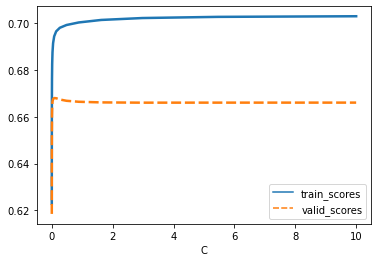

In [25]:
from sklearn.model_selection import validation_curve
import seaborn as sns

train_scores, valid_scores = validation_curve(LogisticRegression(solver='liblinear'), X, y, "C", logistic_parameters['C'],cv=10, scoring = "roc_auc")

viz = pd.DataFrame([np.array(logistic_parameters['C']),train_scores.mean(axis=1),valid_scores.mean(axis=1)]).T
viz.columns = ['C','train_scores','valid_scores']
viz = viz.set_index('C')
sns.lineplot(data=viz, palette="tab10", linewidth=2.5)

Pomocu RandomizedSearchCV cemo malo bolje pretraziti okolinu optimalne vrednosti za C. Uniformno cemo uzimati neku od vrednosti za C u intervalu (0.3, 1), a za penalty cemo slucajno uzimati jednu od vrednosti (l1, l2). Biracemo 100 tacaka i kros-validacijom utvrditi koja je to nasa otpimalna kombinacija hiperparametara.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

logistic_params = {'C' : scipy.stats.uniform(0.3, 1),
                  'penalty' : ['l1', 'l2']}

number_iterations = 100

random_s = RandomizedSearchCV(LogisticRegression(solver="liblinear"), param_distributions = logistic_params, 
                              n_iter = number_iterations, cv = 10, scoring = "roc_auc")

random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000268E974CE20>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

Najbolja kombinacija hiperparametara C i penalty:

In [27]:
random_s.best_params_

{'C': 0.5176837053578198, 'penalty': 'l1'}

Model sa najboljim vrednostima hiperparametara C i penalty:

In [28]:
random_s.best_estimator_

LogisticRegression(C=0.5176837053578198, penalty='l1', solver='liblinear')

Vrednosti hiperparametara koje su isprobane:

In [29]:
random_s.cv_results_['params']

[{'C': 1.182262743820696, 'penalty': 'l1'},
 {'C': 1.0720100166378164, 'penalty': 'l1'},
 {'C': 0.8015985837344308, 'penalty': 'l1'},
 {'C': 0.5525863787497103, 'penalty': 'l2'},
 {'C': 0.373271864780297, 'penalty': 'l1'},
 {'C': 0.43458265512829214, 'penalty': 'l1'},
 {'C': 1.1698584952923152, 'penalty': 'l2'},
 {'C': 0.6080995311594573, 'penalty': 'l2'},
 {'C': 1.1263687613838147, 'penalty': 'l1'},
 {'C': 0.796723236367199, 'penalty': 'l1'},
 {'C': 0.8813695815078841, 'penalty': 'l2'},
 {'C': 0.8856409583963469, 'penalty': 'l1'},
 {'C': 0.9607685999793523, 'penalty': 'l1'},
 {'C': 1.277215663631735, 'penalty': 'l2'},
 {'C': 0.5176837053578198, 'penalty': 'l1'},
 {'C': 0.3167017582240112, 'penalty': 'l1'},
 {'C': 0.9896759351750746, 'penalty': 'l1'},
 {'C': 1.0606292589497819, 'penalty': 'l1'},
 {'C': 1.2607910129421567, 'penalty': 'l1'},
 {'C': 0.5509660791677498, 'penalty': 'l2'},
 {'C': 0.45992814795851383, 'penalty': 'l2'},
 {'C': 0.82383818498233, 'penalty': 'l2'},
 {'C': 1.10333

Kreirajmo model logisticke regresije sa otpimalno podesenim hiperparametrima:

In [30]:
lr = random_s.best_estimator_
lr.fit(X_train,y_train)

LogisticRegression(C=0.5176837053578198, penalty='l1', solver='liblinear')

Vrednost auc na train delu (ocenjen kroz kros validaciju):

In [31]:
cross_val_score(lr, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6781660045171163

Kreiranje predikcija i matrice konfuzije na test delu:

In [32]:
y_pred_lr = lr.predict_proba(X_test)[:, 1] >= 0.1
y_pred_lr

confusion_matrix(y_test, y_pred_lr)

array([[900, 865],
       [ 75, 200]], dtype=int64)

Vrednost auc na test delu:

In [33]:
roc_auc_score(y_test, y_pred_lr)

0.6185938707185166

Racunanje standardnih evaluacionih metrika na test delu:

In [34]:
print_performance(y_test, y_pred_lr)

Accuracy : 0.5392156862745098
Precision : 0.18779342723004694
Recall : 0.7272727272727273
F1 : 0.29850746268656714


Koeficijenti uz promenljive kod optimalnog modela:

In [35]:
lr.coef_

array([[ 0.        ,  0.18447419,  0.01773199, -0.04547836, -0.46271684,
         0.0227213 ,  0.04598103,  0.20782951,  0.        ,  0.        ,
         0.26624719, -0.22228836,  0.        ,  0.        ,  0.        ,
         0.        ,  0.31609175,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.46356881,  1.17775235,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.30018657,
         0.        ,  0.        , -0.52575138,  0.        ,  0.        ,
         0.        , -0.04886646,  0.36083028,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.11797311,  0.        ,  0.        ,  0.17053004, -0.10262882,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.18942262, -0.03446284,  0.        ,
         0.        , -0.75945129,  0.        , -0.71984626, -0.35578601,
         0.        , -0.13909064,  0.        ,  0. 

Prikazimo graficki znacajnost svakog atributa:

<AxesSubplot:ylabel='att'>

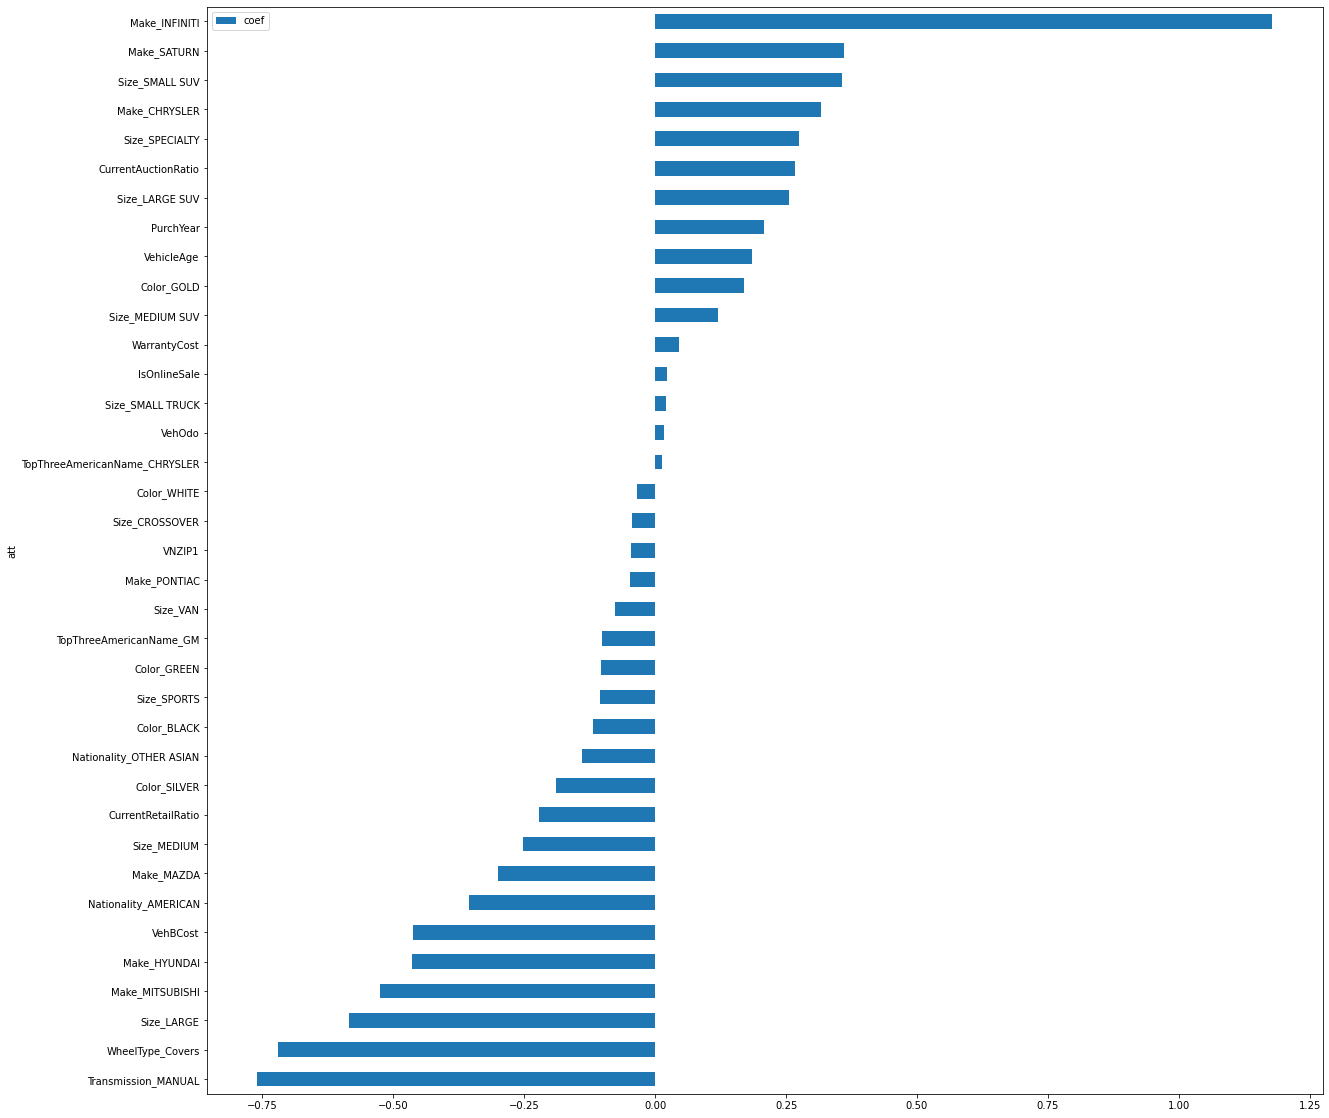

In [36]:
coef = pd.DataFrame({'att': X.columns, 'coef': lr.coef_[0]}).sort_values(by='coef', ascending=True)
coef = coef.loc[coef['coef'] != 0, :]
coef.plot.barh(x='att', y='coef', figsize=(20, 20))

#### KNN

Ispitajmo koje su to optimalne vrednosti hiperparametrima kod knn algoritma n_neighbors, weights i metric u odnosu na evaluacionu metriku auc u ovom slucaju:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors' : [3,5,7,9,11,13,15], 'weights' : ['uniform', 'distance'],  'metric' : ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, scoring="roc_auc")
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [38]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

Kreirajmo knn model sa optimalno podesenim vrednostima hiperparametara:

In [39]:
knn_model = grid_knn.best_estimator_
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

In [40]:
cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6299510017149254

Kreirajmo predikcije i matricu konfuzije na test setu:

In [41]:
y_pred_knn = knn_model.predict_proba(X_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_knn)

array([[922, 843],
       [106, 169]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [42]:
print_performance(y_test, y_pred_knn)

Accuracy : 0.5348039215686274
Precision : 0.16699604743083005
Recall : 0.6145454545454545
F1 : 0.26262626262626265


Auc na test delu:

In [43]:
roc_auc_score(y_test, y_pred_knn)

0.568462528972444

#### VOTING

Kreirajmo Votingclassifier() i ubacimo otpimalno podesenu logisticku regresiju i stablo odlucivanja kao algoritme koji glasaju. Stavicemo da je nacin glasanja "soft", odnosno da ce se porediti verovatnoce za svaku opservaciju:

In [44]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(voting = "soft", estimators=[('lr', lr), ('tree', model_tree), ('knn', knn_model)])

model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.5176837053578198,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=15,
                                                     max_features=5,
                                                     min_samples_leaf=21)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15,
                                                   weights='distance'))],
                 voting='soft')

Sracunajmo vrednost za auc na train delu (pomocu kros-validacije):

In [45]:
cross_val_score(model_voting, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6687270724489508

Kreirajmo predikcije i matricu konfuzije na test delu:

In [46]:
y_pred_voting = model_voting.predict_proba(X_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_voting)

array([[818, 947],
       [ 67, 208]], dtype=int64)

Prikazimo standardne evaluacione metrike sracunate iz matrice konfuzije:

In [47]:
print_performance(y_test, y_pred_voting)

Accuracy : 0.5029411764705882
Precision : 0.1800865800865801
Recall : 0.7563636363636363
F1 : 0.29090909090909095


Sracunajmo auc na test delu:

In [48]:
roc_auc_score(y_test, y_pred_voting)

0.6099098635075972

#### STACKING

Kreirajmo StackingClassifier() sa optimalno podesenim algoritimima logisticke regresije i stabla odlucivanja:

In [49]:
from mlxtend.classifier import StackingClassifier
model_stacking = StackingClassifier(classifiers = [lr, model_tree],
                                   meta_classifier = lr,
                                   use_features_in_secondary=True)
model_stacking.fit(X_train, y_train)


StackingClassifier(classifiers=[LogisticRegression(C=0.5176837053578198,
                                                   penalty='l1',
                                                   solver='liblinear'),
                                DecisionTreeClassifier(max_depth=15,
                                                       max_features=5,
                                                       min_samples_leaf=21)],
                   meta_classifier=LogisticRegression(C=0.5176837053578198,
                                                      penalty='l1',
                                                      solver='liblinear'),
                   use_features_in_secondary=True)

Sracunajmo auc na train delu (kroz kros validaciju):

In [50]:
cross_val_score(model_stacking, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6781865993515488

Kreraijmo predikcije i matricu konfuzije na test delu:

In [51]:
y_pred_stacking = model_stacking.predict_proba(X_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_stacking)

array([[904, 861],
       [ 74, 201]], dtype=int64)

Sracunajmo osnovne evaluacione metrike iz matrice konfuzije:

In [52]:
print_performance(y_test, y_pred_stacking)

Accuracy : 0.5416666666666666
Precision : 0.18926553672316385
Recall : 0.730909090909091
F1 : 0.30067314884068813


Sracunajmo auc na test delu:

In [53]:
roc_auc_score(y_test, y_pred_stacking)

0.6215451970126191

#### BAGGING

Kreirajmo BaggingClassifier(), gde cemo kao base_estimator staviti optimalno podeseni model logisticke regresije:

In [54]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(base_estimator = lr, bootstrap=100)
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.5176837053578198,
                                                    penalty='l1',
                                                    solver='liblinear'),
                  bootstrap=100)

Auc na train delu:

In [55]:
cross_val_score(model_bagging, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6800369912674815

Kreirajmo predikcije i matricu konfuzije na test delu:

In [56]:
y_pred_bagging = model_bagging.predict_proba(X_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_bagging)

array([[924, 841],
       [ 82, 193]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [57]:
print_performance(y_test, y_pred_bagging)

Accuracy : 0.5475490196078432
Precision : 0.18665377176015474
Recall : 0.7018181818181818
F1 : 0.29488158899923606


Auc na test delu:

In [58]:
roc_auc_score(y_test, y_pred_bagging)

0.6126654648467679

#### RANDOM FOREST

Kreirajmo RandomForestClassifier sa 200 stabala:

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, oob_score = True)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

Sracunajmo auc na train delu (kroz kros-validaciju):

In [60]:
cross_val_score(forest, X_train, y_train, cv=10, scoring='roc_auc').mean()

0.6591997792737129

Pogledajmo koliko forest(suma) svaki od atributa smatra znacajnim:

In [61]:
forest.feature_importances_

array([3.31779771e-02, 3.46015098e-02, 8.25925465e-02, 7.39042754e-02,
       8.93565742e-02, 4.57591898e-03, 6.49868405e-02, 1.30476664e-02,
       7.94899750e-02, 8.15023993e-02, 8.39591377e-02, 8.12326600e-02,
       4.19240850e-04, 1.92591109e-03, 0.00000000e+00, 7.34131994e-03,
       7.68597317e-03, 7.85318154e-03, 7.08059678e-03, 9.13236378e-04,
       6.92313638e-04, 8.50452766e-07, 1.87375193e-03, 2.47261608e-03,
       3.84008189e-05, 2.30679780e-03, 3.32839791e-03, 6.53981525e-04,
       7.19918970e-05, 1.79240503e-03, 1.99418209e-03, 6.40505927e-04,
       9.93026995e-04, 2.43532187e-03, 5.06818656e-04, 0.00000000e+00,
       3.89380409e-03, 5.38528554e-03, 3.15487639e-05, 0.00000000e+00,
       3.14306175e-03, 1.36648995e-03, 4.06440632e-04, 6.69802221e-06,
       4.33147405e-03, 8.22973107e-03, 1.01171448e-02, 2.63368679e-03,
       9.25851578e-03, 5.27335057e-03, 1.02818102e-02, 4.29655888e-03,
       3.56047480e-04, 2.92445228e-04, 1.09881009e-03, 2.31351541e-03,
      

Kreirajmo predikcije i matricu konfuzije na test delu:

In [62]:
y_pred_forest = forest.predict_proba(X_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_forest)

array([[865, 900],
       [ 68, 207]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [63]:
print_performance(y_test, y_pred_forest)

Accuracy : 0.5254901960784314
Precision : 0.18699186991869918
Recall : 0.7527272727272727
F1 : 0.2995658465991317


Auc na test delu:

In [64]:
roc_auc_score(y_test, y_pred_bagging)

0.6126654648467679

Da nam je zeljena metrika accuracy, mogli bi direktno iz objekta forest da izvucemo koliko iznosi vrednost metrike na "test delu", odnosno na onom delu dataseta koji nije uzet prilikom kreiranja algoritma:

In [65]:
forest.oob_score_

0.8734762505254309

# SELEKCIJA ATRIBUTA

In [66]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

Pokusacemo da na osnovu zavisnosti varijable sa izlaznom utvrdimo kojih 50 varijabli su najbolje za kreiranje modela:

In [67]:
# K BEST
selection = SelectKBest(k=20, score_func = f_classif)
selection.fit(X, y)
selection.get_support()

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False])

Uzmimo podset samo 50 najboljih varijabli kao ulaz u algoritam:

In [68]:
X_reduced_kbest = X.loc[:, selection.get_support()]

 Deljenje u train i test novih podataka:

In [69]:
X_reduced_kbest_train, X_reduced_kbest_test, y_train, y_test = train_test_split(X_reduced_kbest, y, test_size=0.3, random_state=2019)

### Pravljenje otpimalnih algoritama sa best_k

#### STABLO ODLUCIVANJA

Kreirajmo model stabla odlucivanja sa optimalnom podesenim hiperparametrima, ali cemo na ulazu koristiti samo 50 najboljih atributa:

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': [3,4,5,6,7,8,9,10], 'min_samples_leaf': [10,15,20,25,30], 'max_depth': [5,7,8,9,10,15,20]}
grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring='roc_auc')
grid.fit(X_reduced_kbest_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 8, 9, 10, 15, 20],
                         'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 15, 20, 25, 30]},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [71]:
grid.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 25}

Pogledajmo kako izgleda model stabla sa optimalno podesenim hiperparametrima:

In [72]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=25)

Kreirajmo optimalno stablo:

In [73]:
model_tree_bestk = grid.best_estimator_
model_tree_bestk.fit(X_reduced_kbest_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=25)

Ispitajmo vrednosti auc na train delu:

In [74]:
cross_val_score(model_tree_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6132673411466394

Kreirajmo predikcije i matricu konfuzije na test delu:

In [75]:
y_pred_tree_bestk = model_tree_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.2
confusion_matrix(y_test, y_pred_tree_bestk)

array([[1453,  312],
       [ 189,   86]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [76]:
print_performance(y_test, y_pred_tree_bestk)

Accuracy : 0.7544117647058823
Precision : 0.21608040201005024
Recall : 0.31272727272727274
F1 : 0.2555720653789005


Ispitajmo vrednosti za auc na test delu:

In [77]:
roc_auc_score(y_test, y_pred_tree_bestk)

0.5679783672418233

#### LOGISTICKA REGRESIJA

Kreirajmo model logisticke regresije sa optimalnom podesenim hiperparametrima, ali cemo na ulazu koristiti samo 50 najboljih atributa. Kako znamo da je optimalno C u vise navrata iznosilo 0.5, nema potrebe za gridom i prolaskom kroz vise redova velicina, vec je sasvim u redu da se ogranicimo na interval od (0.3, 1):

In [78]:
logistic_params = {'C' : scipy.stats.uniform(0.3, 1),
                  'penalty' : ['l1', 'l2']}

number_iterations = 100

random_s = RandomizedSearchCV(LogisticRegression(solver="liblinear"), param_distributions = logistic_params, 
                              n_iter = number_iterations, cv = 10, scoring = "roc_auc")

random_s.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000268E99B1EE0>,
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

Izgradimo optimalan model:

In [79]:
lr_bestk = random_s.best_estimator_
lr_bestk.fit(X_reduced_kbest_train, y_train)

LogisticRegression(C=0.5132666251005873, penalty='l1', solver='liblinear')

Rezultati auc na train delu:

In [80]:
cross_val_score(lr_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6762259400432719

Kreirajmo predikcije i matricu konfuzije:

In [81]:
y_pred_lr_bestk = lr_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_lr_bestk)

array([[879, 886],
       [ 69, 206]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [82]:
print_performance(y_test, y_pred_lr_bestk)

Accuracy : 0.5318627450980392
Precision : 0.18864468864468864
Recall : 0.7490909090909091
F1 : 0.30138990490124357


Rezultati auc na test delu:

In [83]:
roc_auc_score(y_test, y_pred_lr_bestk)

0.623553953129024

Kreiranje grafikona najbitnijih atributa:

<AxesSubplot:ylabel='att'>

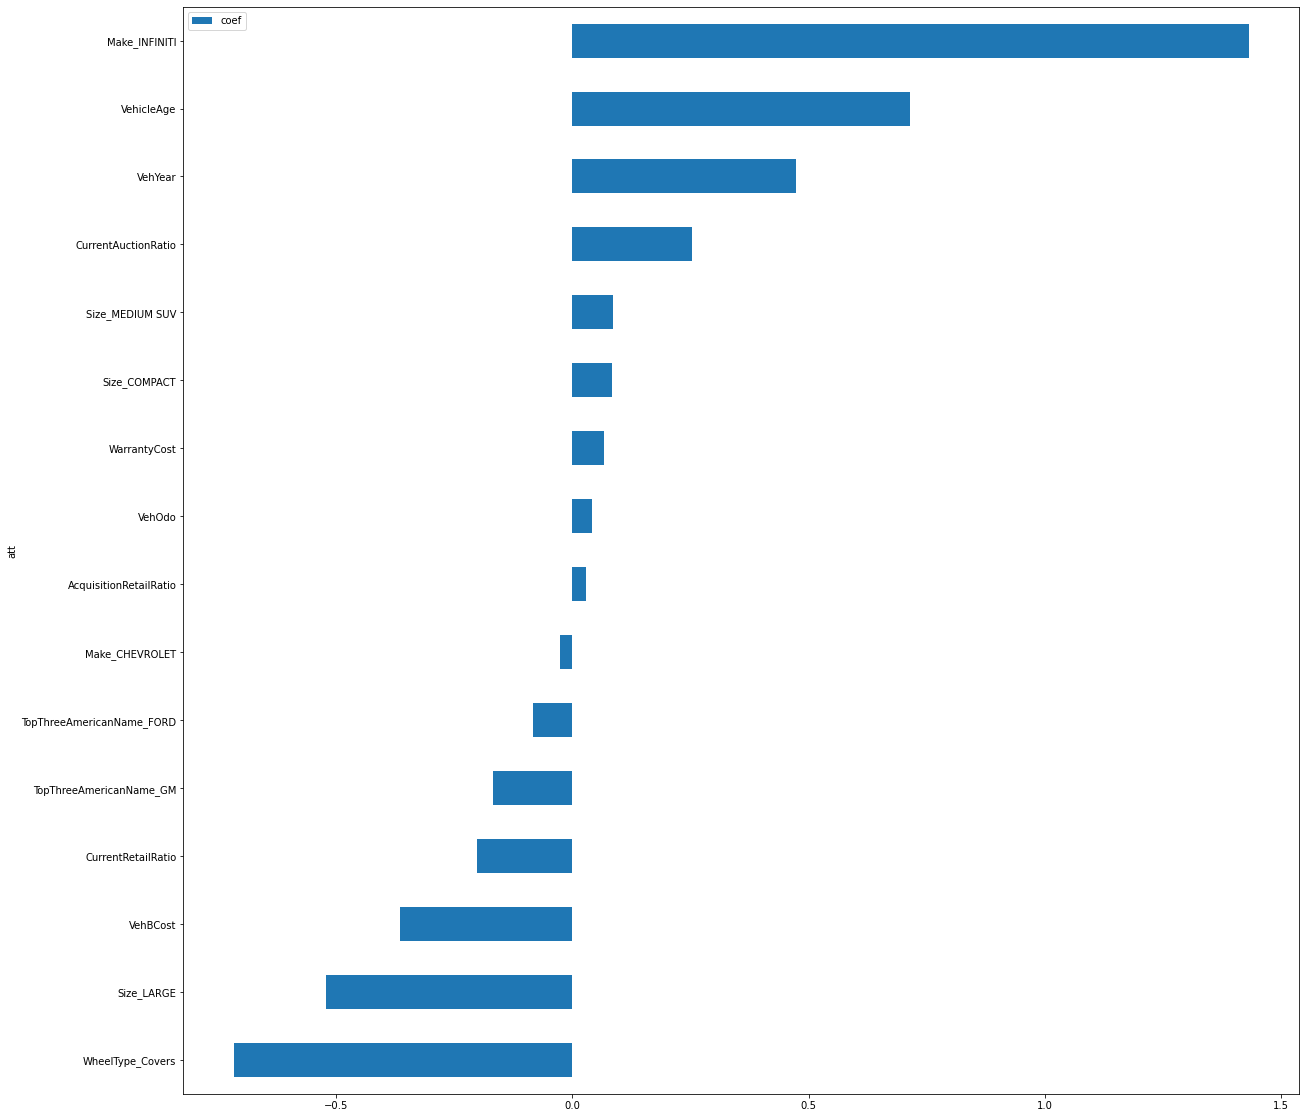

In [114]:
coef = pd.DataFrame({'att': X_reduced_kbest_train.columns, 'coef': lr_bestk.coef_[0]}).sort_values(by='coef', ascending=True)
coef = coef.loc[coef['coef'] != 0, :]
coef.plot.barh(x='att', y='coef', figsize=(20, 20))

#### KNN

Ispitajmo koje su to vrednosti za hiperparametre na podskupu bitnih ulaznih atributa za maksimizaciju auc-a:

In [84]:
knn_params = {'n_neighbors' : [3,5,7,9,11,13,15], 'weights' : ['uniform', 'distance'],  'metric' : ['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, scoring="roc_auc")
grid_knn.fit(X_reduced_kbest_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

Pogledajmo koje su to optimalne vrednosti hiperparametara:

In [85]:
grid_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

Kreirajmo model sa optimalno podesenim hiperparametrima:

In [86]:
knn_model_bestk = grid_knn.best_estimator_
knn_model_bestk.fit(X_reduced_kbest_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

Auc na train delu:

In [87]:
cross_val_score(knn_model_bestk, X_reduced_kbest_train, y_train, cv = 10, scoring = 'roc_auc').mean()

0.6462471504217746

Kreirajmo predikcije i matricu konfuzije na test delu:

In [88]:
y_pred_knn_bestk = knn_model_bestk.predict_proba(X_reduced_kbest_test)[:, 1] >= 0.1
confusion_matrix(y_test, y_pred_knn_bestk)

array([[945, 820],
       [100, 175]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [89]:
print_performance(y_test, y_pred_knn_bestk)

Accuracy : 0.5490196078431373
Precision : 0.17587939698492464
Recall : 0.6363636363636364
F1 : 0.2755905511811024


Auc na test delu:

In [90]:
roc_auc_score(y_test, y_pred_knn_bestk)

0.5858872006180788

#### VOTING

Kreirajmo VotingClassifier sa optimalno podesenim modelima na podskupu bitnih atributa:

In [91]:
model_voting_bestk = VotingClassifier(voting = "soft", estimators=[('lr', lr_bestk), ('tree', model_tree_bestk),
                                                                  ('knn', knn_model_bestk)])

model_voting_bestk.fit(X_reduced_kbest_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.5132666251005873,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=5,
                                                     min_samples_leaf=25)),
                             ('knn',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=15,
                                                   weights='distance'))],
                 voting='soft')

Auc na train delu:

In [92]:
cross_val_score(model_voting_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6840679622208361

Kreirajmo predikcije i matricu konfuzije:

In [93]:
y_pred_voting_bestk = model_voting_bestk.predict_proba(X_reduced_kbest_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_voting_bestk)

array([[899, 866],
       [ 83, 192]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [94]:
print_performance(y_test, y_pred_voting_bestk)

Accuracy : 0.5348039215686274
Precision : 0.18147448015122875
Recall : 0.6981818181818182
F1 : 0.28807201800450116


Auc na test delu:

In [95]:
roc_auc_score(y_test, y_pred_voting_bestk)

0.6037651300540819

#### STACKING

Kreirajmo StackingClassifier sa optimalno podesenim modelima na podskupu bitnih atributa:

In [96]:
model_stacking_bestk = StackingClassifier(classifiers = [lr_bestk, model_tree_bestk],
                                   meta_classifier = lr_bestk,
                                   use_features_in_secondary=True)
model_stacking_bestk.fit(X_reduced_kbest_train, y_train)


StackingClassifier(classifiers=[LogisticRegression(C=0.5132666251005873,
                                                   penalty='l1',
                                                   solver='liblinear'),
                                DecisionTreeClassifier(max_depth=5,
                                                       max_features=5,
                                                       min_samples_leaf=25)],
                   meta_classifier=LogisticRegression(C=0.5132666251005873,
                                                      penalty='l1',
                                                      solver='liblinear'),
                   use_features_in_secondary=True)

Auc na train delu:

In [97]:
cross_val_score(model_stacking_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6763599342169029

Kreirajmo predikcije i matricu konfuzije na test delu:

In [98]:
y_pred_stacking_bestk = model_stacking_bestk.predict_proba(X_reduced_kbest_test)[:,1] > 0.1
confusion_matrix(y_test, y_pred_stacking_bestk)

array([[879, 886],
       [ 69, 206]], dtype=int64)

Sracunajmo i prikazimo standardne evaluacione metrike:

In [99]:
print_performance(y_test, y_pred_stacking_bestk)

Accuracy : 0.5318627450980392
Precision : 0.18864468864468864
Recall : 0.7490909090909091
F1 : 0.30138990490124357


Auc na test delu:

In [100]:
roc_auc_score(y_test, y_pred_stacking_bestk)

0.623553953129024

#### BAGGING

Kreirajmo BaggingClassifier(), gde cemo kao base_estimator staviti optimalno podeseni model logisticke regresije na podskupu ulaznih podataka:

In [101]:
model_bagging_bestk = BaggingClassifier(base_estimator = lr_bestk, bootstrap=200)
model_bagging_bestk.fit(X_reduced_kbest_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.5132666251005873,
                                                    penalty='l1',
                                                    solver='liblinear'),
                  bootstrap=200)

Auc na train delu:

In [102]:
cross_val_score(model_bagging_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.6760879756103853

Kreirajmo predikcije i matricu konfuzije na test delu:

In [103]:
y_pred_bagging_bestk = model_bagging_bestk.predict_proba(X_reduced_kbest_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_bagging_bestk)

array([[852, 913],
       [ 65, 210]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [104]:
print_performance(y_test, y_pred_bagging_bestk)

Accuracy : 0.5205882352941177
Precision : 0.18699910952804988
Recall : 0.7636363636363637
F1 : 0.30042918454935624


Auc na test delu:

In [105]:
roc_auc_score(y_test, y_pred_bagging_bestk)

0.6231779551892866

#### RANDOM FOREST

Kreirajmo Random forest na podskupu 40 bitnih atributa:

In [106]:
forest_bestk = RandomForestClassifier(n_estimators = 200, oob_score = True)
forest_bestk.fit(X_reduced_kbest_train, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

Auc na train delu:

In [107]:
cross_val_score(forest_bestk, X_reduced_kbest_train, y_train, cv=10, scoring='roc_auc').mean()

0.65579913424215

Kreirajmo predikcije i matricu konfuzije na test delu:

In [108]:
y_pred_forest_bestk = forest_bestk.predict_proba(X_reduced_kbest_test)[:, 1] > 0.1
confusion_matrix(y_test, y_pred_forest_bestk)

array([[857, 908],
       [ 83, 192]], dtype=int64)

Sracunajmo i odstampajmo standardne evaluacione metrike:

In [109]:
print_performance(y_test, y_pred_forest_bestk)

Accuracy : 0.5142156862745098
Precision : 0.17454545454545456
Recall : 0.6981818181818182
F1 : 0.2792727272727273


Auc na test delu:

In [110]:
roc_auc_score(y_test, y_pred_forest_bestk)

0.5918671130569149